In [165]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse

# Задание 3

In [166]:
def draw_svd_vectors(matrix):
  u, s, v = np.linalg.svd(matrix, full_matrices=True)

  v = v[:2, :2]
  u = u[:2, :2]
  u *= s
  
  fig, ax = plt.subplots(figsize=(10, 10))
  plt.arrow(0, 0, *v[0], width=0.01, color='r', length_includes_head=True)
  plt.arrow(0, 0, *v[1], width=0.01, color='b', length_includes_head=True)
  ax.add_patch(plt.Circle((0, 0), 1, color='black', fill=False))

  plt.xlim(-1.1, 1.1)
  plt.ylim(-1.1, 1.1) 
  plt.show()

  fig, ax = plt.subplots(figsize=(6, 6))
  ax.add_patch(Ellipse(xy=(0, 0), width=2*s[0], height=2*s[1],
                       angle=-np.arccos(u[0, 0]/np.linalg.norm(u[:, 0])) * 180 / np.pi,
                       color='black', fill=False))
  plt.arrow(0, 0, *u[:, 0], width=0.01, color='r', length_includes_head=True)
  plt.arrow(0, 0, *u[:, 1], width=0.01, color='b', length_includes_head=True)
  
  borders = np.array([-1., 1])
  borders *= 1.05 * np.max(np.abs(u))
  plt.xlim(borders)
  plt.ylim(borders)
  plt.show()

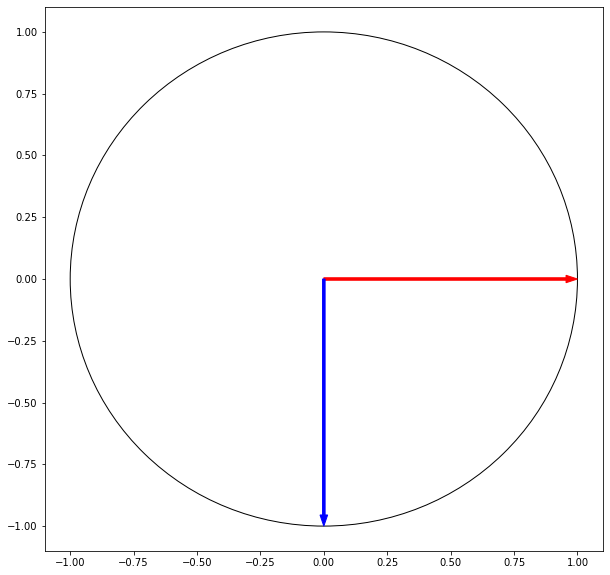

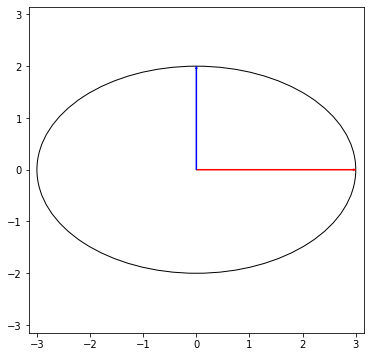

-------------------------


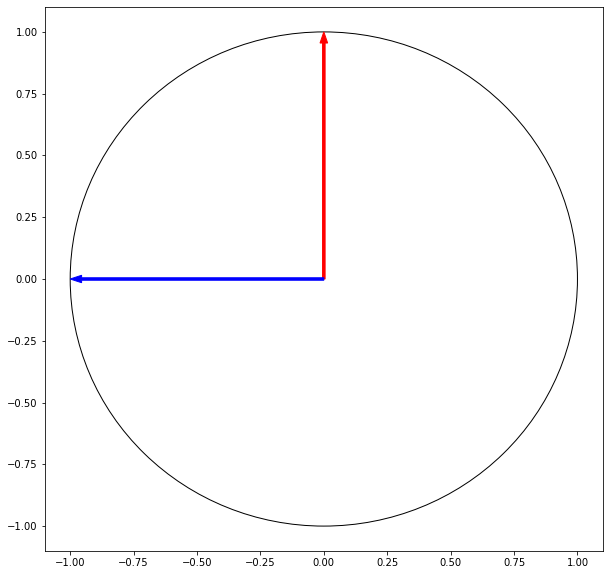

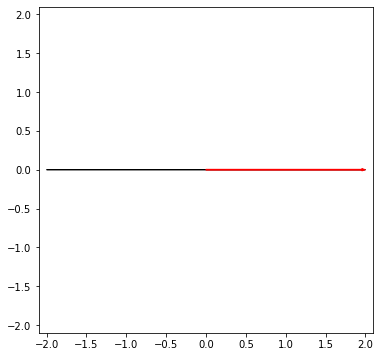

-------------------------


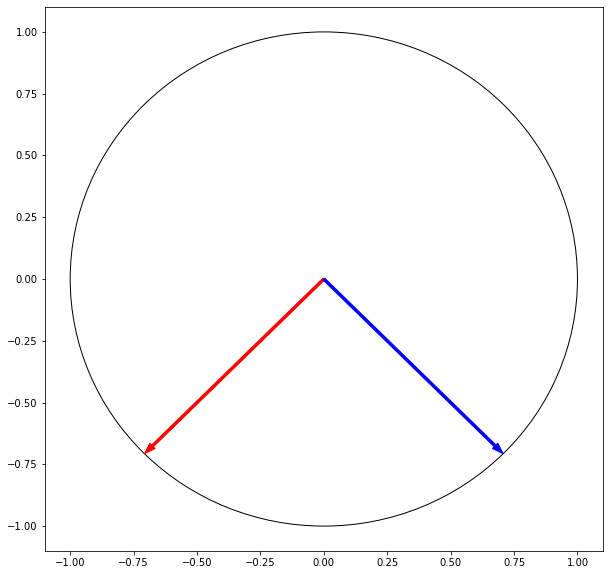

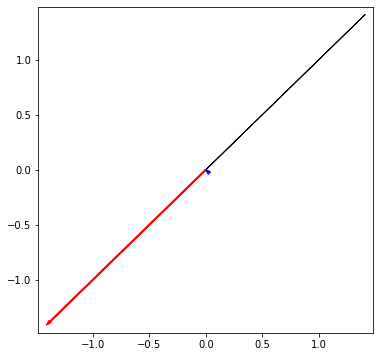

-------------------------


In [167]:
a = np.array([[3, 0],
              [0, -2]])

b = np.array([[0, 2],
              [0, 0],
              [0, 0]])

c = np.array([[1, 1],
              [1, 1]])

for i in [a, b, c]:
  draw_svd_vectors(i)
  print("-------------------------")

# Задание 5

In [168]:
def woodbury(A, U, V):
  p, k = A.shape[0], V.shape[0]
  A_inv = np.diag(1 / np.diagonal(A))
  C = np.eye(k)

  A_inv_U = A_inv @ U
  result = A_inv
  result -= A_inv_U @ np.linalg.inv(C + V @ A_inv_U) @ V @ A_inv
  return result

def inverse(A, U, V):
  return np.linalg.inv(A + U @ V)

In [169]:
A = np.diag(np.random.rand(5)) * 10
U = np.random.rand(5, 3) * 10
V = np.random.rand(3, 5) * 10

np.testing.assert_allclose(inverse(A, U, V), woodbury(A, U, V), rtol=1e-5)

In [170]:
p = 5000
k = 100

In [171]:
%%timeit
A = np.diag(np.random.rand(p)) * 10
U = np.random.rand(p, k) * 10
V = np.random.rand(k, p) * 10

inverse(A, U, V)

1 loop, best of 3: 10.5 s per loop


In [172]:
%%timeit
A = np.diag(np.random.rand(p)) * 10
U = np.random.rand(p, k) * 10
V = np.random.rand(k, p) * 10

woodbury(A, U, V)

1 loop, best of 3: 7.61 s per loop


# Задание 7

In [173]:
data = np.genfromtxt('signatureData2.csv',  delimiter=',')
x1, y1 = data[:, 0], data[:, 1]
x2, y2 = data[:, 2], data[:, 3]

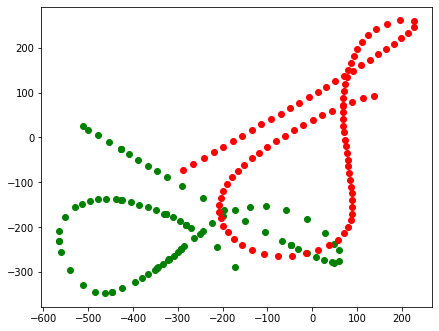

In [174]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_aspect(1)
plt.scatter(x1, y1, c='g')
plt.scatter(x2, y2, c='r')

In [175]:
X1 = np.vstack((x1, y1)).T
X2 = np.vstack((x2, y2)).T

avg1 = np.average(X1, axis=0)
avg2 = np.average(X2, axis=0)

X1 -= avg1
X2 -= avg2

In [176]:
u, s, vt = np.linalg.svd(X1.T @ X2, full_matrices=True)
r = u @ vt
mu = avg2 - r.T @ avg1
moved = np.vstack((x1, y1)).T @ r + mu

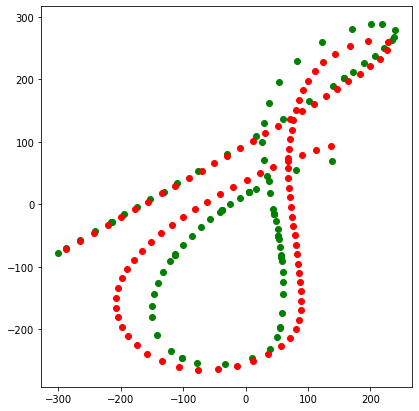

In [177]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_aspect(1)
plt.scatter(moved[:, 0], moved[:, 1], c='g')
plt.scatter(x2, y2, c='r')